In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

death_state_year_cause = pd.read_csv('https://raw.githubusercontent.com/lanceeeaton/Leading_Causes_of_Death/master/death_state_year_cause.csv')
death_state_year_cause.rename(columns={'Age-adjusted Death Rate':'Adj-Deaths'}, inplace=True)

causes = death_state_year_cause['Cause Name'].unique()
states = death_state_year_cause['State'].unique()
years = death_state_year_cause['Year'].unique()

## Checking for nulls

In [35]:
death_state_year_cause.isnull().values.any()

False

## Some stats on our data

In [36]:
death_state_year_cause.describe()

,Year,Deaths,Adj-Deaths
count,9180.00000,9180.000000,9180.000000
mean,2007.50000,3725.386928,60.751046
std,5.18841,7161.711981,67.906774
min,1999.00000,21.000000,2.600000
25%,2003.00000,526.000000,18.300000
50%,2007.50000,1401.500000,31.400000
75%,2012.00000,3228.250000,54.900000
max,2016.00000,71930.000000,347.400000


## Looking at observations with lowest death number

In [37]:
death_state_year_cause[death_state_year_cause['Deaths'] == 21.0]

,Year,Cause Name,State,Deaths,Adj-Deaths
9088,2002,Kidney disease,Alaska,21,6.8
9179,2012,Kidney disease,Vermont,21,2.6


## Looking at observations with highest death number

In [38]:
death_state_year_cause[death_state_year_cause['Deaths'] == 71930.0]

,Year,Cause Name,State,Deaths,Adj-Deaths
109,1999,Heart disease,California,71930,257.3


## Ranking the causes by least deaths to most

In [0]:
death_rank = death_state_year_cause.groupby(['Cause Name']).sum().sort_values(['Deaths'])

In [40]:
death_rank['Deaths']

Cause Name
Suicide                      649843
Kidney disease               807980
Influenza and pneumonia     1038969
Diabetes                    1316379
Alzheimer's disease         1373412
Unintentional injuries      2177884
CLRD                        2434726
Stroke                      2580140
Cancer                     10244536
Heart disease              11575183
Name: Deaths, dtype: int64

## Visualizing our ranking in a pie chart

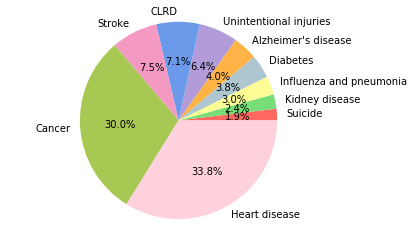

In [41]:
sizes = death_rank['Deaths'].values
labels = death_rank.index.tolist()
colors = ['#ff6961','#77dd77','#fdfd96','#aec6cf','#ffb347','#b19cd9','#6b9aea','#f49ac2','#A8C854','#ffd1dc']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels = labels, autopct = '%1.1f%%')
ax1.axis('equal')
plt.show()

## Checking distribution of each numerical feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05804254a8>,
      dtype=object)

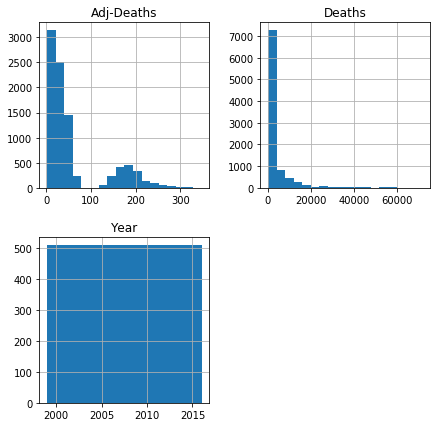

In [42]:
death_state_year_cause.hist(bins = 18, figsize = (7,7))

I believe this is skew is because causes like heart disease and cancer account for many more deaths then causes like suicide and kidney disease.  Only 20% of our observations are for heart disease and cancer but they account 63% of the total deaths. So, 80% of our data is split between 8 different causes so most observations contain a lower number for deaths.

In [43]:
death_state_year_cause.corr()

,Year,Deaths,Adj-Deaths
Year,1.000000,0.005517,-0.075103
Deaths,0.005517,1.000000,0.583347
Adj-Deaths,-0.075103,0.583347,1.000000
